Dataset Head:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


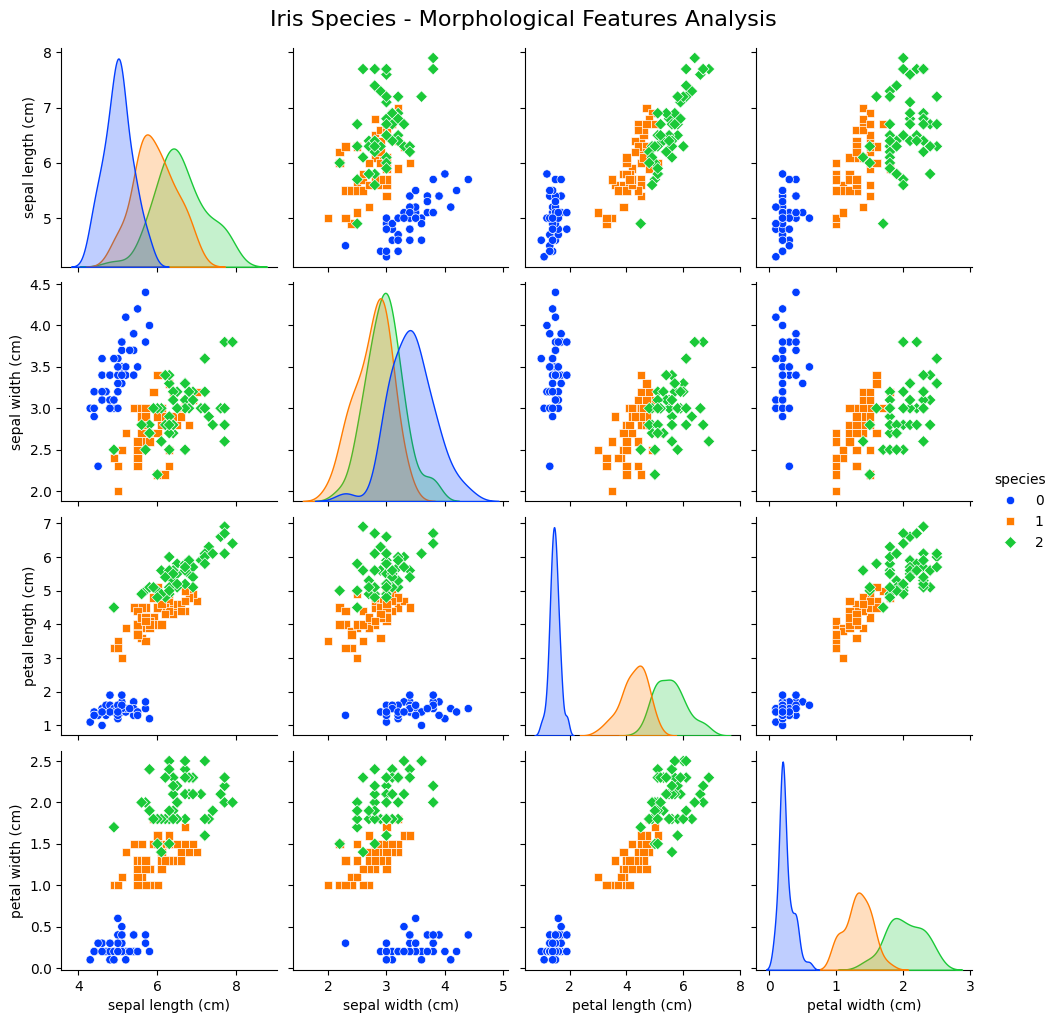

Logistic Regression (Linear) Performance
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



c:\Users\vijay\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


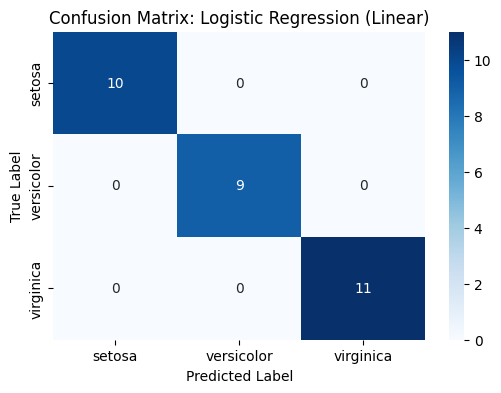

Decision Tree (Non-Linear) Performance
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



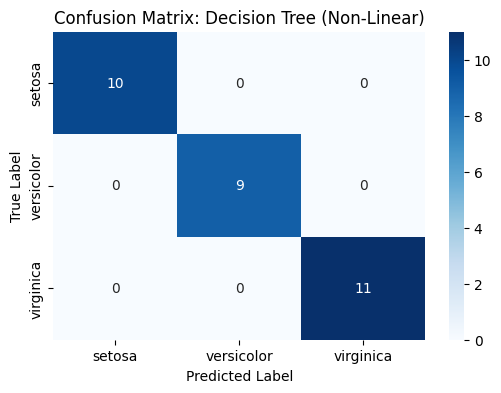


BONUS OBJECTIVE 1: Impact of Reducing Training Data
Accuracy with 10% Data: 0.9481
Interpretation: Model couldn't generalise because of less data

BONUS OBJECTIVE 2: Error Analysis
Perfect accuracy achieved on this split so, no errors to analyze.

BONUS OBJECTIVE 3: Comparing Linear and Non-Linear Model
Linear Model Accuracy:     100.00%
Non-Linear Model Accuracy: 100.00%
Conclusion: Both are equal.


In [8]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#1. Load dataset 
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

print("Dataset Head:")
print(df.head())

#2.Exploratory data analysis (Visualization) 
#using seaborn
g = sns.pairplot(df, hue='species', palette='bright', markers=["o", "s", "D"])
# y=1.02 means we are shifting title little above the graph 
g.figure.suptitle("Iris Species - Morphological Features Analysis", y=1.02, fontsize=16)

plt.show()


#3. Preprocessing 
#Features (X) and Target (y)
X = iris.data
y = iris.target

#Splitting data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 3: FEATURE ENGINEERING
#scaling features so that model linear model like Logistic Regression could understand data properly 
#important for Linear Models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# We only transform the test set, we do not fit on it to avoid data leakage.
X_test_scaled = scaler.transform(X_test)

#4. Model Training & Comparision

#Model A: Linear Model (Logistic Regression)
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

#Model B: Non-Linear Model (Decision Tree)
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train) # Trees don't strictly need scaling
y_pred_dt = dt_clf.predict(X_test)

#5. Evaluation & Confusion Matrix 

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=iris.target_names))
    
    # Confusion Matrix Visualization
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

# Evaluate Linear Model
evaluate_model(y_test, y_pred_log, "Logistic Regression (Linear)")

# Evaluate Non-Linear Model
evaluate_model(y_test, y_pred_dt, "Decision Tree (Non-Linear)")

#Bonus objectives Analysis:
#BONUS OBJECTIVE 1: Impact on reducing training data
print("\nBONUS OBJECTIVE 1: Impact of Reducing Training Data")
X_train_small, X_test_rem, y_train_small, y_test_rem = train_test_split(X, y, train_size=0.1, random_state=42)
X_test_small = X_test_rem #Rest of data for testing

model_small = LogisticRegression(max_iter=200)
model_small.fit(X_train_small, y_train_small)
y_pred_small = model_small.predict(X_test_small)

print(f"Accuracy with 10% Data: {accuracy_score(y_test_rem, y_pred_small):.4f}")
print("Interpretation: Model couldn't generalise because of less data")


# BONUS 2: Error Analysis 
print("\nBONUS OBJECTIVE 2: Error Analysis")
# Find indices where prediction was wrong
misclassified_idx = np.where(y_test != y_pred_log)[0] #can use y_pred_small, y_pred_dt for other model

if len(misclassified_idx) > 0:
    print(f"Total Misclassified Samples: {len(misclassified_idx)}")
    for idx in misclassified_idx:
        print(f"Index {idx}: True Class={y_test[idx]}, Predicted={y_pred_log[idx]}")
        print(f"Features: {X_test[idx]}")
        print("Reason: Likely overlap between Versicolor (1) and Virginica (2).")
else:
    print("Perfect accuracy achieved on this split so, no errors to analyze.")
lin_acc=log_reg.score(X_test_scaled,y_test)
non_lin_acc=dt_clf.score(X_test,y_test)


#BONUS OBJECTIVE 3: comparison of linear and Non-linear model
print("\nBONUS OBJECTIVE 3: Comparing Linear and Non-Linear Model")
print(f"Linear Model Accuracy:     {lin_acc * 100:.2f}%")
print(f"Non-Linear Model Accuracy: {non_lin_acc * 100:.2f}%")

if non_lin_acc > lin_acc:
    print("Conclusion: Non-Linear model wins because data is complex.")
elif lin_acc > non_lin_acc:
    print("Conclusion: Linear model wins because data is simple.")
else:
    print("Conclusion: Both are equal.")